<a href="https://colab.research.google.com/github/AadyaAgarwal01/RSI_INDICATOR/blob/main/RSI_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [61]:
import contextlib
import sys, os
import warnings
warnings.filterwarnings("ignore")

@contextlib.contextmanager
def suppress_output():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        old_stderr = sys.stderr
        sys.stdout = devnull
        sys.stderr = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout
            sys.stderr = old_stderr


In [63]:
def download_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Date'] = data.index
    data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    return data

In [64]:
def calculate_rsi(data, period=14):
    delta = data['Close'].diff()

    gain = delta.copy()
    loss = delta.copy()

    gain[gain < 0] = 0
    loss[loss > 0] = 0
    loss = loss.abs()

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    return data


In [65]:
def rsi_strategy(data, lower=30, upper=70):
    data = calculate_rsi(data)
    data['Signal'] = 0
    data['Signal'][data['RSI'] < lower] = 1   # Buy
    data['Signal'][data['RSI'] > upper] = -1  # Sell
    data['Position'] = data['Signal'].shift()
    return data

In [66]:
def backtest(data, initial_capital=100000):
    data['Returns'] = data['Close'].pct_change()
    data['Strategy'] = data['Position'] * data['Returns']
    data['Portfolio'] = (1 + data['Strategy']).cumprod() * initial_capital
    return data

In [67]:
def plot_signals(data, ticker):
    plt.figure(figsize=(14, 8))

    ax1 = plt.subplot(2, 1, 1)
    data['Close'].plot(ax=ax1, label='Close Price', color='black')
    buy = data[data['Signal'] == 1]
    sell = data[data['Signal'] == -1]
    plt.scatter(buy.index, buy['Close'], label='Buy', marker='^', color='green')
    plt.scatter(sell.index, sell['Close'], label='Sell', marker='v', color='red')
    plt.title(f'{ticker} Price with Buy/Sell Signals')
    plt.legend()

    ax2 = plt.subplot(2, 1, 2)
    data['RSI'].plot(ax=ax2, color='blue')
    plt.axhline(70, linestyle='--', color='red')
    plt.axhline(30, linestyle='--', color='green')
    plt.title('RSI')
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  1 of 1 completed


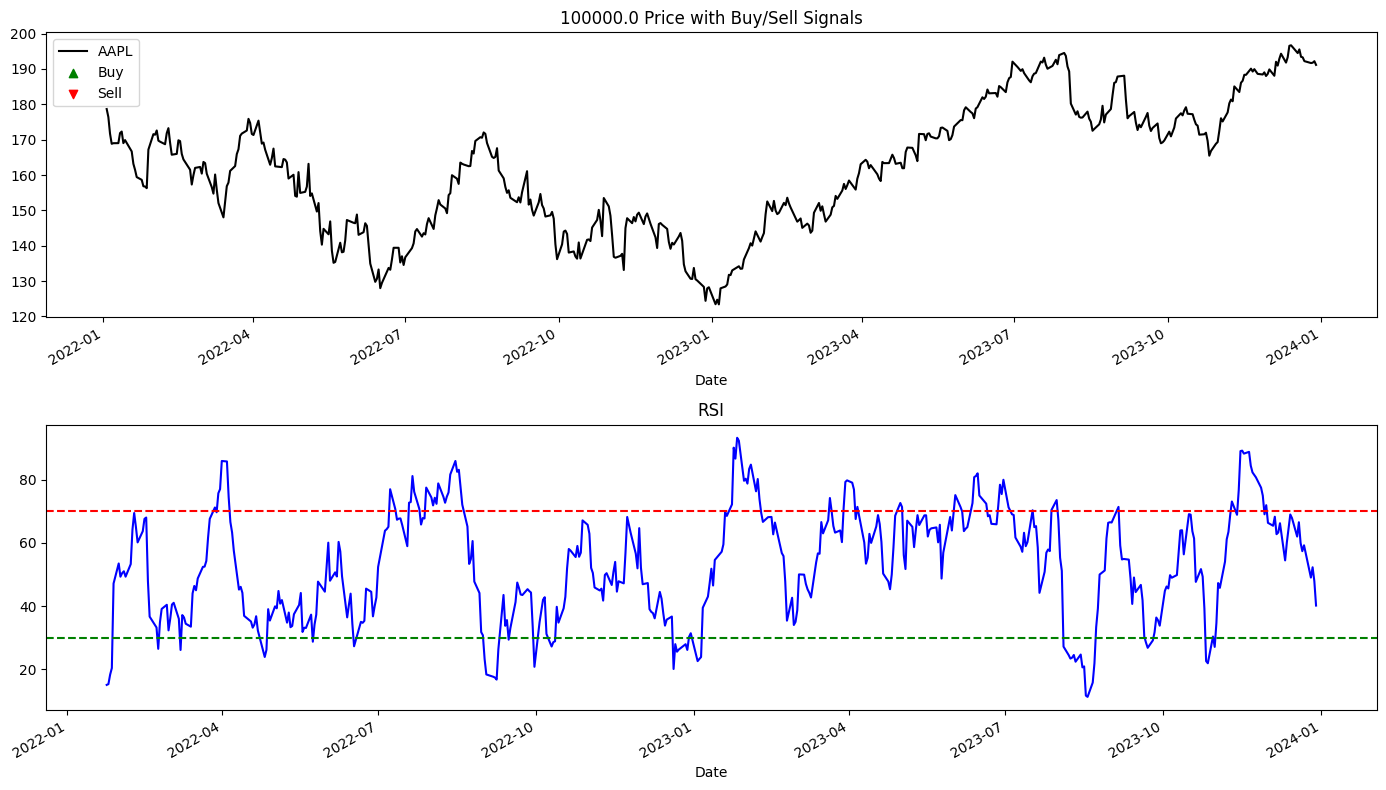

In [75]:
data = download_data('AAPL', '2022-01-01', '2024-01-01')
with suppress_output():
    data = rsi_strategy(data)
    data = backtest(data)
ticker = 100000.0
plot_signals(data, ticker)

[*********************100%***********************]  1 of 1 completed


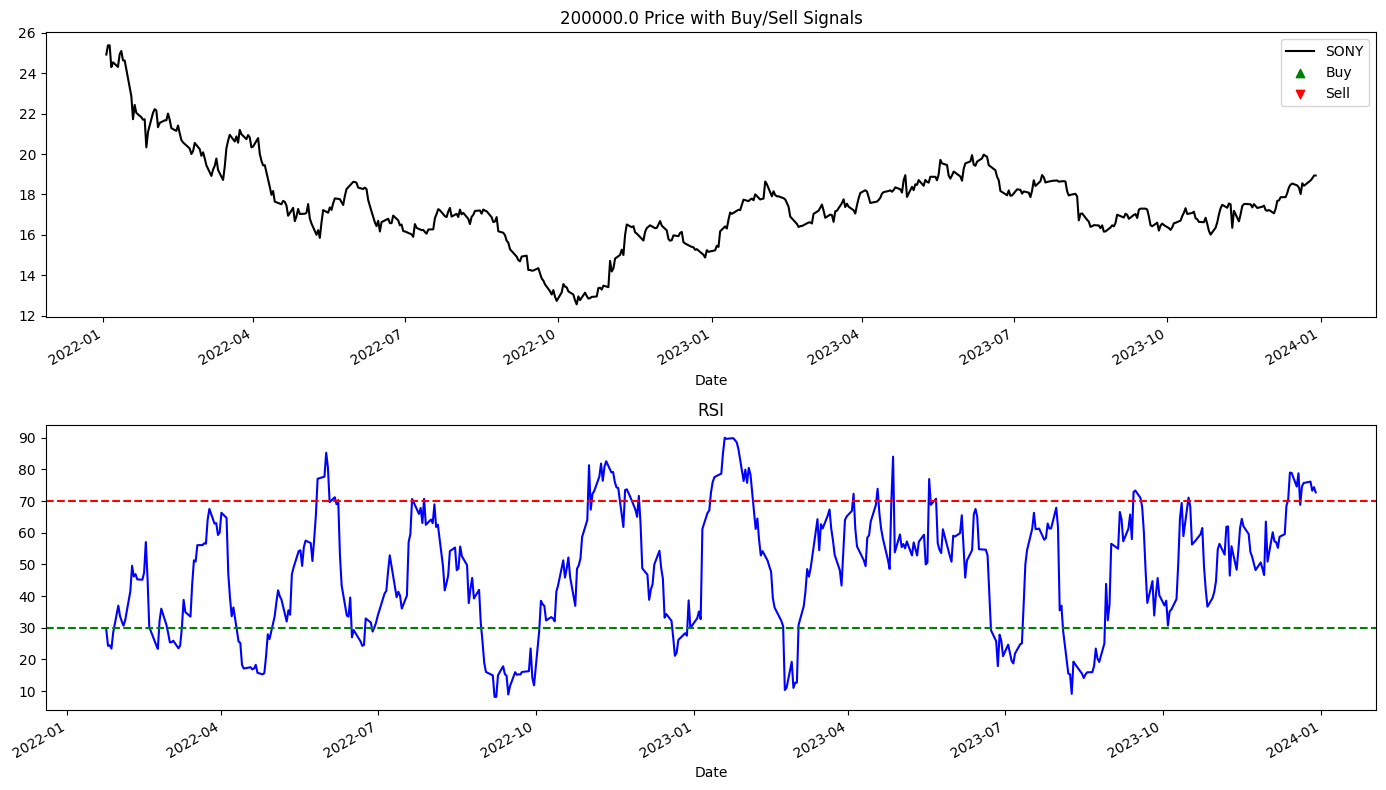

In [76]:
data = download_data('SONY', '2022-01-01', '2024-01-01')
with suppress_output():
    data = rsi_strategy(data)
    data = backtest(data)
ticker = 200000.0
plot_signals(data, ticker)